In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'the-car-connection-picture-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F501015%2F928083%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240310%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240310T185140Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D39bca3f1fa85e4c36c588484aa418511f7ee9f07d3d8d8bcf816149aaac7c48c54c668bfb60615db8ebc4b10f090960682b2a87d170f27c838d39e14ec8716399b3c71bab020dc3f3185f28a0a5c66214c3011eb54249b91da21a7dff0dff4b84950a709b1a13392617d5a2d03fa50cf393ce5e38d8c07785a3e7843c120498dc13b0c88538e2ab1c8ec3acbbbd6c70c52772d4623e99b60ff5468c2c3dc1ef768fedde47a6bd8093be419b79c3a8e33b7ac02bfdab6dfb8dbe285808504778085d6beda2f330e2bb467b7cc333701ecfe2ac413a46813897d3ab95c8c46704063b899ad04186462cf81081aada093289711b9507490e2c39bd651b5c64325d4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


## Necessary Library Imports

In [ ]:
from piltonumpy_helper import pil_to_numpy
import os; import keras; import numpy as np; import pandas as pd; import shutil; from PIL import Image; import cv2
from tqdm import tqdm
from skimage.transform import resize, rescale

import matplotlib.pyplot as plt; import seaborn as sns;

from keras.layers import *
from keras.models import *

from tensorflow.keras.layers import Add
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

In [ ]:
DATA_DIR = '/kaggle/input/the-car-connection-picture-dataset'
LOW_RES = '/kaggle/working/train_lowres'

In [ ]:
os.mkdir('/kaggle/working/train_lowres')

In [ ]:
os.chdir('/kaggle/working/train_lowres')

In [ ]:
files = os.listdir(DATA_DIR)

In [ ]:
len(files)

64467

In [ ]:
files.sort()

In [ ]:
import multiprocessing
from multiprocessing import Process

In [ ]:

def make_low_res(files):
    for file in tqdm(files):
        img = Image.open(DATA_DIR + '/' + file)
        img = pil_to_numpy(img)
        #img = img/255.0
        img = cv2.resize(img, (256, 256))
        img = cv2.resize(cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC), None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
        im = Image.fromarray(img)
        im.save(file)


In [ ]:
import time

In [ ]:
# Making the low resolution folder in parallel processing

start = time.time()

p1 = Process(target = make_low_res, args = (files[:15000],))
p2 = Process(target = make_low_res, args = (files[15000:30000],))
p3 = Process(target = make_low_res, args = (files[30000:45000],))
p4 = Process(target = make_low_res, args = (files[45000:60000],))
p5 = Process(target = make_low_res, args = (files[60000:],))

p1.start()
p2.start()
p3.start()
p4.start()
p5.start()

p1.join()
p2.join()
p3.join()
p4.join()
p5.join()

end = time.time()

print('time elapsed -> ', end - start)

100%|██████████| 15000/15000 [03:18<00:00, 75.53it/s]


time elapsed ->  198.6500244140625


In [ ]:
len(os.listdir('/kaggle/working/train_lowres'))

64467

### Make Datagenerators

In [ ]:


def fetch_data_generator(files, batch_size = 64):
    while True:
        #
        batch_files = np.random.choice(files, batch_size)

        batch_x = [] ; batch_y = [];

        for file in batch_files:
            img = cv2.resize(pil_to_numpy(Image.open(DATA_DIR + '/' + file)).astype(float), (256,256))
            img_low = pil_to_numpy(Image.open(LOW_RES + '/' + file)).astype(float)

            batch_x.append(img_low/255.0)
            batch_y.append(img/255.0)


        yield np.array(batch_x), np.array(batch_y)

## Model Creation

Encoder Network

In [ ]:
"""encoder = Sequential()
encoder.add(Conv2D(64, (3,3) , padding = 'same', activation = 'relu', input_shape = (256, 256, 3)))
encoder.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
encoder.add(MaxPooling2D((2,2), padding = 'same'))
encoder.add(Dropout(0.3))
encoder.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
encoder.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
encoder.add(MaxPooling2D((2,2), padding = 'same'))
encoder.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
encoder.summary()"""

"encoder = Sequential()\nencoder.add(Conv2D(64, (3,3) , padding = 'same', activation = 'relu', input_shape = (256, 256, 3)))\nencoder.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))\nencoder.add(MaxPooling2D((2,2), padding = 'same'))\nencoder.add(Dropout(0.3))\nencoder.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))\nencoder.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))\nencoder.add(MaxPooling2D((2,2), padding = 'same'))\nencoder.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))\nencoder.summary()"

Decoder Network

the decoder network would be the extension of the encoder

In [ ]:
#autoencoder = encoder

In [ ]:
#autoencoder.summary()

In [ ]:
# encoder

keras.backend.set_image_data_format('channels_last')

i1 = Input(shape = (256,256,3))
l1 = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(i1)
l2 = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l1)
l3 = MaxPooling2D(padding = 'same')(l2)
l3 = Dropout(0.3)(l3)
l4 = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l3)
l5 = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l4)
l6 = MaxPooling2D(padding = 'same')(l5)
l7 = Conv2D(256, (3,3), padding = 'same', activation = 'relu')(l6)

# decoder

l8 = UpSampling2D()(l7)
l9 = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l8)
l10 = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l9)
l11 = Add()([l5, l10])
l12 = UpSampling2D()(l11)
l13 = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l12)
l14 = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l13)
l15 = Add()([l14, l2])

# final layer should have 3 channels which will help to reconstruct the image with better resolution
l16 = Conv2D(3, (3,3), padding = 'same', activation = 'relu')(l15)

autoencoder = Model(i1, l16)

In [ ]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mean_squared_error')

## Training the Model

In [ ]:
autoencoder.fit_generator(fetch_data_generator(files, 32), steps_per_epoch = len(files)//32, epochs = 10)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2014/2014 [==============================] - 923s 456ms/step - loss: 0.1859
Epoch 2/10
2014/2014 [==============================] - 918s 456ms/step - loss: 0.0105
Epoch 3/10
2014/2014 [==============================] - 918s 456ms/step - loss: 0.0074
Epoch 4/10
2014/2014 [==============================] - 917s 455ms/step - loss: 0.0058
Epoch 5/10
2014/2014 [==============================] - 917s 455ms/step - loss: 0.0048
Epoch 6/10
2014/2014 [==============================] - 917s 456ms/step - loss: 0.0042
Epoch 7/10
2014/2014 [==============================] - 917s 455ms/step - loss: 0.0038
Epoch 8/10
2014/2014 [==============================] - 917s 455ms/step - loss: 0.0035
Epoch 9/10
2014/2014 [==============================] - 918s 456ms/step - loss: 0.0032
Epoch 10/10
2014/2014 [==============================] - 917s 455ms/step - loss: 0.0031


In [ ]:
autoencoder.save('trained_10epochs.h5')

In [ ]:
# Load Model
# uncomment to load the model with supplied weights & config, i.e., hdf5

#trained_model = keras.models.load_model('my_model.h5')

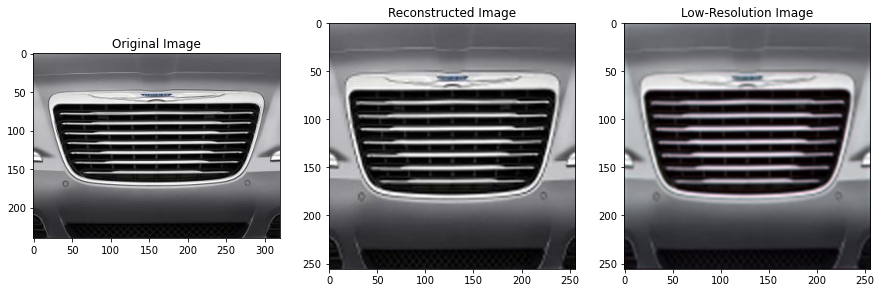

In [ ]:
import numpy as np
from PIL import Image

def pil_to_numpy(img):
    """
    Convert a PIL image to a numpy array.
    """
    return np.array(img).astype(float)

# select a random image from the dataset
file = np.random.choice(files)

# load the original image
img = Image.open(DATA_DIR + '/' + file)

# load the low-resolution image
img_low = pil_to_numpy(Image.open(LOW_RES + '/' + file))

# predict the reconstructed image using the trained autoencoder
reconstructed_img = autoencoder.predict(np.array([img_low/255.0]))[0]

# plot the original image, low-resolution image, and the reconstructed image
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(img)
axes[0].set_title('Original Image')

axes[2].imshow(reconstructed_img)
axes[2].set_title('Low-Resolution Image')


axes[1].imshow(img_low/255.0)
axes[1].set_title('Reconstructed Image')


plt.show()